1. Intensity Transformation

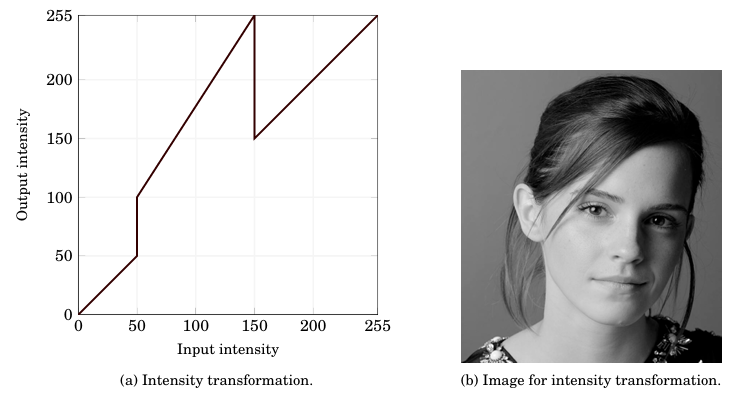

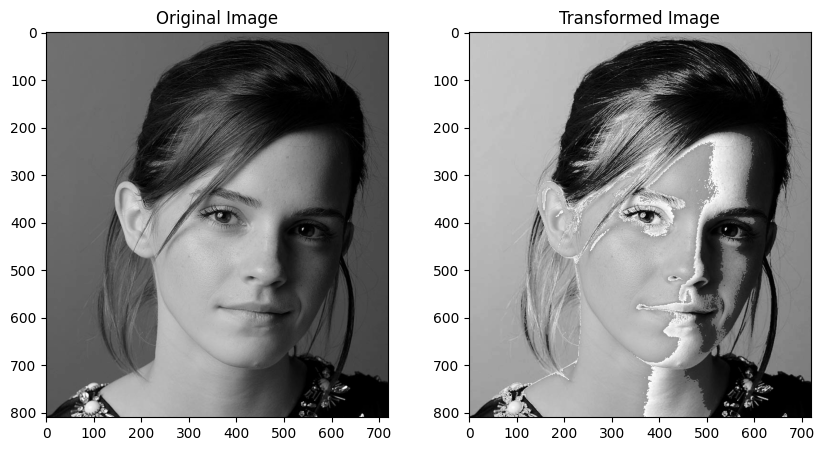

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images\\emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

# intensity transformation
def intensity_transform(pixel):
    if 0 <= pixel < 50:
        return int(pixel)
    elif 50 <= pixel < 150:
        return int(1.55 * pixel + 22.5)
    elif 150 <= pixel < 255:
        return int(pixel)
    else:
        return 0
    
    

# Vectorize the transformation function
vectorized_transform = np.vectorize(intensity_transform)

# Apply the transformation
transformed_image = vectorized_transform(img)

# Display the original and transformed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')

plt.show()



2. Identify Brain density


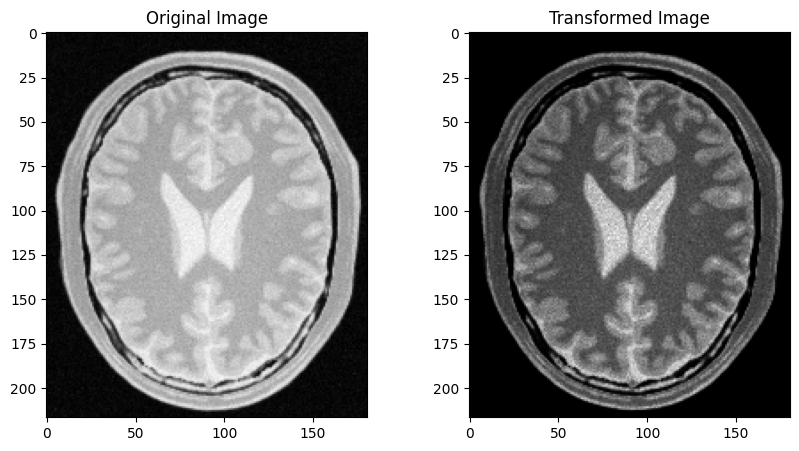

In [7]:
# open the brain_proton_density_slice.png image

img = cv.imread('a1images\\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# intensity transformation and identify the white matter and gray matter in the cell

# apply gamma correction
def gamma_correction(pixel, gamma):
    return int(255 * (pixel / 255) ** gamma)

# Vectorize the transformation function
vectorized_transform = np.vectorize(gamma_correction)

# Apply the transformation
transformed_image = vectorized_transform(img, 3)


# Display the original and transformed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')

plt.show()

# Identify the white matter and gray matter in the cell

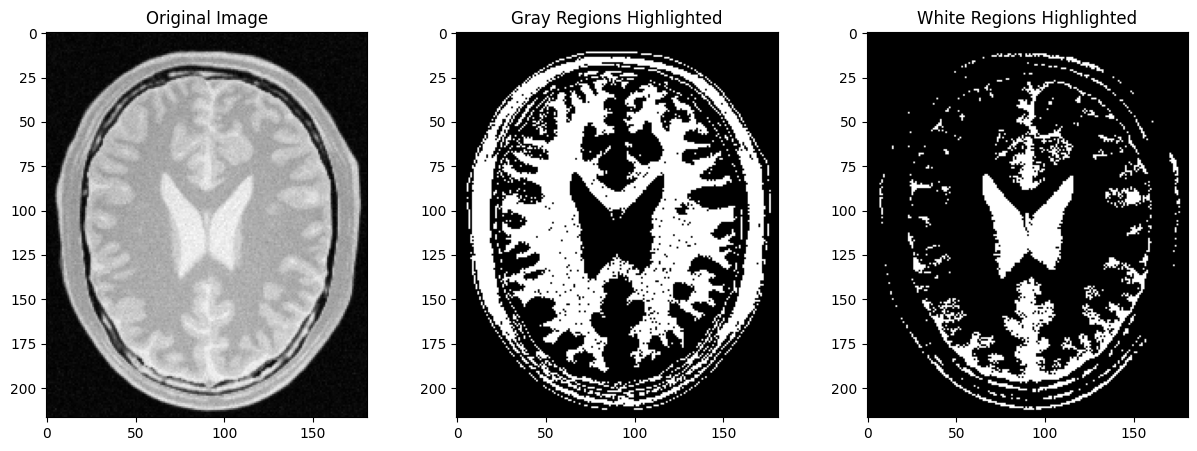

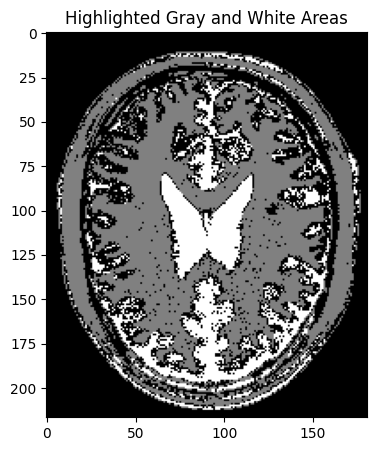

In [8]:
# Highlight gray region (Intensity range: 100-180)
gray_mask = cv.inRange(img, 100, 180)

# Highlight white region (Intensity range: 200-255)
white_mask = cv.inRange(img, 200, 255)

# Create a highlighted image with different colors for gray and white
highlighted_image = np.zeros_like(img)
highlighted_image[gray_mask > 0] = 128  # Set gray regions to a lighter shade
highlighted_image[white_mask > 0] = 255  # Set white regions to full intensity (white)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gray Regions Highlighted')
plt.imshow(gray_mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('White Regions Highlighted')
plt.imshow(white_mask, cmap='gray')

plt.show()

# Combine both masks and display the highlighted image
plt.figure(figsize=(10, 5))
plt.title('Highlighted Gray and White Areas')
plt.imshow(highlighted_image, cmap='gray')
plt.show()